<a href="https://colab.research.google.com/github/DavidSenseman/BIO1173/blob/main/Class_03_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---------------------------
**COPYRIGHT NOTICE:** This Jupyterlab Notebook is a Derivative work of [Jeff Heaton](https://github.com/jeffheaton) licensed under the Apache License, Version 2.0 (the "License"); You may not use this file except in compliance with the License. You may obtain a copy of the License at

> [http://www.apache.org/licenses/LICENSE-2.0](http://www.apache.org/licenses/LICENSE-2.0)

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

------------------------

# **BIO 1173: Intro Computational Biology**

##### **Module 3: Convolutional Neural Networks (CNN's)**

* Instructor: [David Senseman](mailto:David.Senseman@utsa.edu), [Department of Biology, Health and the Environment](https://sciences.utsa.edu/bhe/), [UTSA](https://www.utsa.edu/)

### Module 3 Material

* **Part 3.1: Using Convolutional Neural Networks**
* Part 3.2: Using Pre-Trained Neural Networks with Keras
* Part 3.3: Facial Recognition and Analysis
* Part 3.4: Introduction to GAN's for Image and Data Generation

# **You MUST Change Your Runtime Type Now!**

#### **Buying a Colab Membership**

To run the code in this lesson, you will need to have a paid subscription to Colab. A paid membership is only $9.99 a month and you can cancel at anytime. To purchase a paid membership, check out: [Google Colab Paid Services](https://colab.research.google.com/signup).

If you have a paid membership, you should choose the `A100 GPU`. Instead of waiting hours for this lesson to run, training times will usually be less than 10 minutes.

Don't forget to change the your runtime if you just bought a paid membership.

To run the code in this assignment (Class_03_1) you will need to change your runtime type **BEFORE**  you begin working on this lesson. That's because when you change your runtime type, all your previous work is erased!

To change your runtime type, select the downward pointing triangle at the top right of your CoLab notebook as illustrated in the image below.

![__](https://biologicslab.co/BIO1173/images/class_06/class_06_1_image67.png)

That will give a pop-up window showing the available GPU's and TPU's that you can use with your paid CoLab PRO subscription.

The different GPU and TPU selections change from time to time as new accelerators are developed. More importantly, the available choices will also depend upon how many of the CoLab users are currently using a particular accelerator for their coding.

In this course, you should always select a **GPU** for your hardware acceleration. For example, at of the time this lesson was created, the **100 GPU** was selected as the hardware accelerator.

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_1_image02B.png)

Once you have pressed the `Save` button, you can continue with this lesson.

## Google CoLab Instructions

You MUST run the following code cell to get credit for this class lesson. By running this code cell, you will map your GDrive to /content/drive and print out your Google GMAIL address. Your Instructor will use your GMAIL address to verify the author of this class lesson.

In [ ]:
# You must run this cell first
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    from google.colab import auth
    auth.authenticate_user()
    COLAB = True
    print("Note: Using Google CoLab")
    import requests
    gcloud_token = !gcloud auth print-access-token
    gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()
    print(gcloud_tokeninfo['email'])
except:
    print("**WARNING**: Your GMAIL address was **not** printed in the output below.")
    print("**WARNING**: You will NOT receive credit for this lesson.")
    COLAB = False

You should see the following output except your GMAIL address should appear on the last line.

![__](https://biologicslab.co/BIO1173/images/class_01/class_01_6_image01A.png)

If your GMAIL address does not appear your lesson will **not** be graded.

## Accelerated Run-time Check

You MUST run the following code cell to get credit for this class lesson. The code in this cell checks what hardware acceleration you are using. To run this lesson, you must be running a Graphics Processing Unit (GPU).

In [ ]:
# You must run this cell second

import tensorflow as tf

def check_device():
    # Check for available devices
    devices = tf.config.list_physical_devices()

    # Initialize device flags
    cpu = False
    gpu = False
    tpu = False

    # Check device types
    for device in devices:
        if device.device_type == 'CPU':
            cpu = True
        elif device.device_type == 'GPU':
            gpu = True
        elif device.device_type == 'TPU':
            tpu = True

    # Output device status
    if tpu:
        print("Running on TPU")
        print("WARNING: You must run this assigment using a GPU to earn credit")
        print("Change your RUNTIME now!")
    elif gpu:
        print("Running on GPU")
        gpu_info = !nvidia-smi
        gpu_info = '\n'.join(gpu_info)
        print(gpu_info)
        print("You are using a GPU hardware accelerator--You're good to go!")
    elif cpu:
        print("Running on CPU")
        print("WARNING: You must run this assigment using a GPU to earn credit")
        print("Change your RUNTIME now!")
    else:
        print("No compatible device found")
        print("WARNING: You must run this assigment using either a GPU or a TPU to earn credit")
        print("Change your RUNTIME now!")


# Call the function
check_device()

If you current `Runtime` is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_05/class_05_4_image11A.png)

However, if you received this warning message

![__](https://biologicslab.co/BIO1173/images/class_05/class_05_4_image14A.png)

You **MUST** go back and change your `Runtime` now before you continue.


### Create Functions

The cell below creates several functions that are needed for this assignment. If you don't run this cell you will receive errors later when you try to run some cells.

In [ ]:
# Create functions for this lesson

import psutil
import os

def check_current_ram():
  ram = psutil.virtual_memory()
  print(f"Available RAM: {ram.available / (1024 ** 3):.2f} GB")

def list_files():
   files = os.listdir('.')
   print(f"Current files: {files}")

def list_extract():
  files = os.listdir(EXTRACT_TARGET)
  print(f"Current files in EXTRACT_TARGET: {files}")

# Simple function to print out elasped time
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)

### **YouTube Introduction to the `MNIST` Dataset**

Run the next cell to see short introduction to the MNIST Dataset. This is a suggested, but optional, part of the lesson.

In [1]:
from IPython.display import HTML
video_id = "SrT6QkQUH4Q"
HTML(f"""
<iframe width="560" height="315"
  src="https://www.youtube.com/embed/{video_id}"
  title="YouTube video player"
  frameborder="0"
  allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture"
  allowfullscreen>
</iframe>
""")

# **Keras Neural Networks for Medical MNIST**

This module will focus on computer vision. There are some important differences and similarities with previous neural networks.

* We will usually use classification, though regression is still an option.
* The input to the neural network is now 3D (height, width, _and_ color)
* Data are not transformed; no more Z-scores or dummy variables.
* Processing time is **_much_**  longer.
* We now have different layer types. Besides dense layers, we now have _convolution layers_, and _max-pooling layers_.
* Data will no longer arrive as tabular data stored in CSV files, but as hundred or even thousands of **_images_**.

## **Common Computer Vision Data Sets**

There are many data sets for computer vision. Two of the most popular classic datasets are the MNIST digits data set and the CIFAR image data sets. We will be using two MNIST data sets in this lesson. It is important to be familiar with both sets, neural network texts often refer to them.

The [MNIST Digits Data Set](http://yann.lecun.com/exdb/mnist/) is very popular in the neural network research community. You can see a sample of it below.

**Figure 6.MNIST: MNIST Data Set**

![MNIST Data Set](https://biologicslab.co/BIO1173/images/class_8_mnist.png "MNIST Data Set")

The original MNIST Digit Data Set is a large database of handwritten digits that is commonly used for training various image processing systems. It was created by Yan LeCun, Corinna Cortes, and Christopher Burges as a benchmark for evaluating machine learning algorithms in the field of computer vision. The dataset was first released in 1998 and consists of 60,000 training images and 10,000 testing images of handwritten digits from 0 to 9.

The MNIST dataset has been widely used in the research community to develop and test classification algorithms, particularly in the field of deep learning. It has become a standard benchmark for evaluating the performance of machine learning models on image recognition tasks. Despite its simplicity, the MNIST dataset remains popular due to its ease of use and ability to quickly assess the effectiveness of new algorithms.

Over the years, the MNIST dataset has been used in numerous research studies and competitions, leading to the development of more advanced techniques in computer vision. It continues to be a valuable resource for researchers and practitioners in the field of machine learning.

[MedMINST Data Sets](https://medmnist.com/) are a collection of 18 standardized biomedical datasets produced by a consortium of researchers at Harvard University and colaborators in Germany and China. The image sets cover a variety medical tissues and cell types including Chest X-Rays, Colon Pathology, Breast Ultrasound, Blood Cytology and Abdominal CT scans. The `RetinaMINST` dataset has 1,600 fundus camera samples (1,080 training, 120 validation, 400 test).

**Figure 6.MedMNIST: RetinaMNIST Data Set**

![RetinaMNIST](https://biologicslab.co/BIO1173/images/class_06/RetinaMNIST.jpg "RetinaMNIST")

The [CIFAR-10 and CIFAR-100](https://www.cs.toronto.edu/~kriz/cifar.html) datasets are also frequently used by the neural network research community.


**Figure 6.CIFAR: CIFAR Data Set**

![CIFAR Data Set](https://biologicslab.co/BIO1173/images/class_8_cifar.png "CIFAR Data Set")

The CIFAR-10 data set contains low-rez images that are divided into 10 classes. The CIFAR-100 data set contains 100 classes in a hierarchy.

# **Convolutional Neural Networks (CNNs)**

The convolutional neural network (CNN) is a neural network technology that has profoundly impacted the area of computer vision (CV). Fukushima  (1980) [[Cite:fukushima1980neocognitron]](https://www.rctn.org/bruno/public/papers/Fukushima1980.pdf) introduced the original concept of a convolutional neural network, and   LeCun, Bottou, Bengio & Haffner (1998) [[Cite:lecun1995convolutional]](http://yann.lecun.com/exdb/publis/pdf/lecun-bengio-95a.pdf) greatly improved this work.

From this research, Yan LeCun introduced the famous LeNet-5 neural network architecture. This chapter follows the **LeNet-5 style** of convolutional neural network. Although computer vision primarily uses CNNs, this technology has some applications outside of the field. You need to realize that if you want to utilize CNNs on non-visual data, you must find a way to encode your data to mimic the properties of visual data.  

The order of the input array elements is _crucial_ to the training. In contrast, most neural networks that are not CNNs, treat their input data as a long vector of values. The order in which you arrange the incoming features in this vector is irrelevant. Importantly, you can't change the order of the data in these vectors for these types of neural networks once your network has been trained.

On the other hand, the CNN network arranges the inputs into a **grid**. This arrangement works well with images because the pixels in closer proximity to each other are important to each other. The order of pixels in an image is significant. The human body is a relevant example of this type of order. For the design of the face, we are accustomed to eyes being near to each other.

This advance in CNNs is due to years of research on biological eyes. In other words, CNNs utilize overlapping fields of input to simulate features of biological eyes. Until this breakthrough, AI had been unable to reproduce the capabilities of biological vision.

Scale, rotation, and noise have presented challenges for AI computer vision research. You can observe the complexity of biological eyes in the example that follows.

A friend raises a sheet of paper with a large number written on it. As your friend moves nearer to you, the number is still identifiable. In the same way, you can still identify the number when your friend rotates the paper. Lastly, your friend creates noise by drawing lines on the page, but you can still identify the number.

As you can see, these examples demonstrate the high function of the biological eye and allow you to understand better the research breakthrough of CNNs. That is, this neural network can process scale, rotation, and noise in the field of computer vision. You can see this network structure in Figure 6.LENET.

**LeNET-5 Network (LeCun, 1998)**

![A LeNET-5 Network](https://biologicslab.co/BIO1173/images/class_8_lenet5.png "A LeNET-5 Network")

So far, we have only seen one layer type (dense layers). By the end of this course you will also know about:
  
* **Convolution Layers** - Used to scan across images.
* **Max Pooling Layers** - Used to downsample images.
* **Dropout Layers** - Used to add regularization.
* **LSTM and Transformer Layers** - Used for time series data.

## **Convolution Layers**

The first layer that we will examine is the convolutional layer. We will begin by looking at the hyper-parameters that you must specify for a convolutional layer in most neural network frameworks that support the CNN:

* Number of filters
* Filter Size
* Stride
* Padding
* Activation Function/Non-Linearity

The primary purpose of a convolutional layer is to detect features such as edges, lines, blobs of color, and other visual elements. The filters can detect these features. The more filters we give to a convolutional layer, the more features it can see.

A filter is a square-shaped object that scans over the image. A grid can represent the individual pixels of a grid. You can think of the convolutional layer as a smaller grid that sweeps left to right over each image row. There is also a hyperparameter that specifies both the width and height of the square-shaped filter. The following figure shows this configuration in which you see the six convolutional filters sweeping over the image grid:

A convolutional layer has weights between it and the previous layer or image grid. Each pixel on each convolutional layer is a weight. Therefore, the number of weights between a convolutional layer and its predecessor layer or image field is the following:

```
[FilterSize] * [FilterSize] * [# of Filters]
```

For example, if the filter size were 5 (5x5) for 10 filters, there would be 250 weights.

You need to understand how the convolutional filters sweep across the previous layer's output or image grid. Figure 6.CNN illustrates the sweep:

**Figure 6.CNN: Convolutional Neural Network**
![Convolutional Neural Network](https://biologicslab.co/BIO1173/images/class_8_cnn_grid.png "Convolutional Neural Network")

The above figure shows a convolutional filter with 4 and a padding size of 1. The **padding size** is responsible for the border of zeros in the area that the filter sweeps. Even though the image is 8x7, the extra padding provides a virtual image size of 9x8 for the filter to sweep across. The **stride** specifies the number of positions the convolutional filters will stop. The convolutional filters move to the right, advancing by the number of cells specified in the stride. Once you reach the far right, the convolutional filter moves back to the far left; then, it moves down by the stride amount and continues to the right again.

Some constraints exist concerning the size of the stride. The stride cannot be `0`. The convolutional filter would never move if you set the stride to `0`. Furthermore, neither the stride nor the convolutional filter size can be larger than the previous grid. There are additional constraints on the stride (*s*), padding (*p*), and the filter width (*f*) for an image of width (*w*). Specifically, the convolutional filter must be able to start at the far left or top border, move a certain number of strides, and land on the far right or bottom border. The following equation shows the number of steps a convolutional operator
must take to cross the image:

$$ steps = \frac{w - f + 2p}{s}+1 $$

The number of steps must be an integer. In other words, it cannot have decimal places. The purpose of the padding (*p*) is to be adjusted to make this equation become an integer value.

### **Max Pooling Layers**

Max-pool layers downsample a 3D box to a new one with smaller dimensions. Typically, you can always place a max-pool layer immediately following the convolutional layer. The LENET shows the max-pool layer immediately after layers C1 and C3. These max-pool layers progressively decrease the size of the dimensions of the 3D boxes passing through them. This technique can avoid overfitting (Krizhevsky, Sutskever & Hinton, 2012).

A pooling layer has the following hyper-parameters:

* Spatial Extent (*f*)
* Stride (*s*)

Unlike convolutional layers, max-pool layers do not use padding. Additionally, max-pool layers have no weights, so training does not affect them. These layers downsample their 3D box input. The 3D box output by a max-pool layer will have a width equal to this equation:

$$ w_2 = \frac{w_1 - f}{s} + 1 $$

The height of the 3D box produced by the max-pool layer is calculated similarly with this equation:

$$ h_2 = \frac{h_1 - f}{s} + 1 $$

The depth of the 3D box produced by the max-pool layer is equal to the depth the 3D box received as input. The most common setting for the hyper-parameters of a max-pool layer is f=2 and s=2. The spatial extent (f) specifies that boxes of 2x2 will be scaled down to single pixels. Of these four pixels, the pixel with the maximum value will represent the 2x2 pixel in the new grid. Because squares of size 4 are replaced with size 1, 75% of the pixel information is lost. The following figure shows this transformation as a 6x6 grid becomes a 3x3:

**Figure 6.MAXPOOL: Max Pooling Layer**
![Max Pooling Layer](https://biologicslab.co/BIO1173/images/class_8_conv_maxpool.png "Max Pooling Layer")

Of course, the above diagram shows each pixel as a single number. A grayscale image would have this characteristic. We usually take the average of the three numbers for an RGB image to determine which pixel has the maximum value.

----------------------------------------
### **Supervised _vs_ Unsupervised Machine Learning**

In **_supervised_ machine learning**, the algorithm is trained on a **labeled** dataset, where each training example is paired with the correct output. The goal is to learn a mapping from input features to the corresponding output labels. During training, the algorithm adjusts its parameters to minimize the difference between the predicted output and the true label. Once the model is trained, it can make predictions on new, unseen data by applying the learned mapping. Common supervised learning tasks include classification and regression.

On the other hand, **_unsupervised_ machine learning** involves training the algorithm on an _unlabeled_ dataset, where the algorithm must find patterns or relationships in the data without explicit guidance. The goal of unsupervised learning is to discover hidden structures or clusters in the data. This type of learning is often used for tasks such as clustering, anomaly detection, and dimensionality reduction. Unlike supervised learning, there are no explicit output labels to guide the learning process in unsupervised learning.

---------------------------------------------

# **Example 1: Classification Convolutional Neural Network**

We will now look at an example of a  classification meural network. For _supervised_ computer vision, your dataset will need some labels. For classification, this label usually specifies _what_ the image is a picture of, e.g., dog, cat, carcinoma, etc.

For a classification neural network, we will provide an image and expect the neural network to classify it as being one of several posibilites. In this example, we will use the `bloodmnist_224` dataset from MedMNIST that contains images of different types of blood cells.

The blood cell images and consists of 8 different classes. These classes include Neutrophils, Lymphocytes, Monocytes, Eosinophils, Basophils and Platelets.

Here are images showing the 8 types of blood cells in the `bloodmnist_224` dataset

![___](https://biologicslab.co/BIO1173/images/class_06/BloodCellTypes_A.png)

Each image is 244 X 244 pixels with 3 color channels (RGB).

Our goal will be to create a convolutional neural network (CNN) that can correctly classify a blood cell image as belonging into one of these 8 blood cell types.


### Example Step - 1: Setup Evironmental Variables

**Environmental variables** are similar to hidden settings that tell your computer how to behave. They hold information that can affect how programs run on your system, such as paths to files, system directories, or user-specific settings. It's like setting the stage for your computer to know where to find all its props and scripts.

The code in the cell below creates environmental variables that are needed to download a specific datafile and then to extract this data into specific folders in your Colab notebook.

In [ ]:
# Example Step - 1: Setup Environmental Variables

import os

# Define datafile location
URL = "https://biologicslab.co/BIO1173/data"
DOWNLOAD_SOURCE = URL+"/bloodmnist_224.npz"
DOWNLOAD_NAME = DOWNLOAD_SOURCE[DOWNLOAD_SOURCE.rfind('/')+1:]
print(f"DOWNLOAD_SOURCE {DOWNLOAD_SOURCE}")
print(f"DOWNLOAD_NAME {DOWNLOAD_NAME}")

# Define folder locations to store the data
PATH = "/content"
EXTRACT_TARGET = os.path.join(PATH,"/bloodmnist_224")
SOURCE = os.path.join(EXTRACT_TARGET)
TARGET = SOURCE

# Print out environmental variables
print(f"PATH {PATH}")
print(f"EXTRACT_TARGET {EXTRACT_TARGET}")
print(f"SOURCE {SOURCE}")
print(f"TARGET {TARGET}")

If the code is correct, you should see the following output:

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_1_image04B.png)

We are going to download a datafile called `bloodmnist_224.npz` from the course file server, `https://biologicslab.co`. We will then extract (unzip) its contents into a folder called `/bloodmnist_224`.

### Example Step - 2: Download and Extract Data

In Step 1 we defined the file we wanted to download and the folder in which to place the data after we unzipped it. In the next cell we perform both the download and the extraction.

#### **Download File**

The code in the cell below uses this code chunk to download the datafile.
~~~text
# Download the file
os.system(f"wget -O {download_path} {DOWNLOAD_SOURCE}")
~~~

The program `wget` is a non-interactive network downloader commonly used in Unix-like operating systems. It retrieves files from the web using HTTP, HTTPS, and FTP protocols.

#### **Extract File Contents**

The datafile is compressed (i.e. a `zip file`), so we need to extract the file contents. The next code chunk unzips it to folder specified by the environmental variables defined above:
~~~text
# Extract the file
os.system(f"unzip -o -d {EXTRACT_TARGET} {download_path} >/dev/null")
~~~
The command `unzip` is a command-line utility used to extract files from a ZIP archive.

At the end of the `unzip` command is `>/dev/null`. Normally, the `unzip` command prints out the name of every file that was extracted. Since there are 2,000 images, we don't want to see this print out. Instead the output is sent instead to `> dev/null` which hids the output. `dev/null` a special file that discards all data written to it—like a black hole for unnecessary or unwanted output. If you send a program’s output to /dev/null, it's basically saying, "I don't need this, just throw it away."

In [ ]:
# Example Step - 2: Download and Extract Data

import os

print("Creating necessary directories...", end='')
# Create necessary directories
os.makedirs(SOURCE, exist_ok=True)
os.makedirs(EXTRACT_TARGET, exist_ok=True)
print("done.")

print("Downloading files...", end='')
# Define paths and URLs
download_path = os.path.join(PATH, DOWNLOAD_NAME)
extract_path = os.path.join(EXTRACT_TARGET, DOWNLOAD_NAME)

# Download the file
os.system(f"wget -O {download_path} {DOWNLOAD_SOURCE}")
print("done.")

print("Extracting files...", end='')
# Extract the file
os.system(f"unzip -o -d {EXTRACT_TARGET} {download_path} >/dev/null")
print("done.")


If the code is correct, you should see the following output:

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_1_image05B.png)

Image datafiles used by CNN neural networks need to be relatively large which means they take a fair amount of time to download and extract. They also require a lot of memory and disk space to store and process. This is one of the main reasons for using Google Colab instead of trying to do this on your laptop.

### Example Step - 3: Load and Shuffle Images and Labels into Numpy arrays

Image data in dataset can be stored in different formats. In many cases the image data is stored as individual pictures (frames) in a JPEG format or PNG format.

However, in this dataset, the images are stored in a collect of numpy arrays. The Numpy `.npy` format is a way to save Numpy arrays to disk in a binary file. This format stores the shape, data type, and data of the array efficiently, allowing for fast reading and writing making it perfect for handling large amounts of numerical data in a compact, easy-to-access way.

The code in the cell below reads the images and their corresponding labels using the Numpy command `np.load()` to create 6 numpy arrays containing the `training`, `test` and `validation` images and their labels.   

In addition to `unpacking` the images, the code also randomly shuffles the data using this code chunk:

~~~text
combined = list(zip(eg_train_images, eg_train_labels))
np.random.shuffle(combined)
eg_X_train, eg_Y_train = zip(*combined)
~~~

Is important to note that when shuffling the images (`eg_train_images`) that their labels (`eg_train_labels`) are shuffled at the same time to keep these arrays "synchronized" (i.e. the right label goes with the right image).

In [ ]:
# Example Step - 3: Load and Shuffle Images and Labels into Numpy arrays

import numpy as np


# ------------------------------------------------------------------------
# 1️⃣  Unpack and shuffle train images
# ------------------------------------------------------------------------
eg_train_images = np.load(os.path.join(SOURCE,"train_images.npy"),)
eg_train_labels = np.load(os.path.join(SOURCE,"train_labels.npy"),)
combined = list(zip(eg_train_images, eg_train_labels))
np.random.shuffle(combined)
eg_X_train, eg_Y_train = zip(*combined)
eg_X_train = np.array(eg_X_train)
eg_Y_train = np.array(eg_Y_train)
print(f"eg_X_train: {eg_X_train.shape}")
print(f"eg_Y_train: {eg_Y_train.shape}")

# ------------------------------------------------------------------------
# 2️⃣  Unpack and shuffle test images
# ------------------------------------------------------------------------
test_images = np.load(os.path.join(SOURCE,"test_images.npy"),)
test_labels = np.load(os.path.join(SOURCE,"test_labels.npy"),)
combined = list(zip(test_images, test_labels))
np.random.shuffle(combined)
eg_X_test, eg_Y_test = zip(*combined)
eg_X_test = np.array(eg_X_test)
eg_Y_test = np.array(eg_Y_test)
print(f"eg_X_test: {eg_X_test.shape}")
print(f"eg_Y_test: {eg_Y_test.shape}")

# ------------------------------------------------------------------------
# 3️⃣  Unpack and shuffle validation images
# ------------------------------------------------------------------------
# Unpack and shuffle val_images
val_images = np.load(os.path.join(SOURCE,"val_images.npy"),)
val_labels = np.load(os.path.join(SOURCE,"val_labels.npy"),)
combined = list(zip(val_images, val_labels))
np.random.shuffle(combined)
eg_X_val, eg_Y_val = zip(*combined)
eg_X_val = np.array(eg_X_val)
eg_Y_val = np.array(eg_Y_val)
print(f"eg_X_val: {eg_X_val.shape}")
print(f"eg_Y_val: {eg_Y_val.shape}")

If the code is correct, you should see the following output:

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_1_image02C.png)

That means that after splitting the data, there are `11,959` images of blood cells in the training set, `3,421` images in the test set and `1,712` images in the validation set. Your values might be slightly different.

**SPLIT DATA**

This MedMNSIT dataset has already been `split` into a training set (`eg_train_images`, `eg_train_labels`), a testing set (`test_images`, `test_labels`) and a validation set (`val_images`, `val_label`). However, in many other image datasets, you will be required to split the image data yourself.

**Image Size**

The image size is given by the array `shape`. For example, here is the output for the train images:

~~~text
eg_train_images: (11959, 224, 224, 3)
~~~

What these `shape` numbers mean is that there is a total of `11959` images in the `eg_train_images` array. Each image is `224` X `224` pixels in size and the last digit, `3`, indicates the images are color images. The 3 stands for 3 color channels: Red, Green and Blue (RGB). If an image only has a single color channel, the image is grayscaled.

----------------------------------------------------
## **Understanding Color Channels in Neural Networks**

#### **Definition**

A **color channel** refers to a component of a digital image that represents intensity values for a specific color. In the context of image processing and neural networks, color channels are used to separate and process the individual color components of an image.

#### **Common Color Channels**

Most commonly, images are represented in the **RGB color space**, which includes three channels:

- **Red (R)**
- **Green (G)**
- **Blue (B)**

Each channel is a 2D matrix (height × width) that stores intensity values for that specific color. When combined, these channels form a full-color image.

#### **Representation in Neural Networks**

In neural networks, especially convolutional neural networks (CNNs), images are typically represented as 3D tensors with the shape given in pixels (e.g. `64,64`)

----------------------------------------------------


### Example - Step 4 - Add Color Channel and Resize Images

When it comes to images in data sets, the number of color channels can vary. Sometimes the images are in color and have 3 color channels (Red, Green, Blue), and sometimes the images only have 1 color channel (Monochrome or "black-and-white"). However, in some data sets, there is no color channel information. The code in the cell below examines the number of color channels in the image dataset and if no color channel information is provided, it adds `monochrome` color change information.

The code also examines the image size to make sure that it is at least `64x64` pixels. If the images in the dataset are less than value (e.g. `32x32`) the code will automatically resize the images in the `training`, the `test` and in the `validation` datasets.

In [ ]:
# Example - Step 4: Add Color Channel and Resize Images

import numpy as np
import tensorflow as tf

# ------------------------------------------------------------------------
# 1️⃣  Add a color channel if not already present
# ------------------------------------------------------------------------
if eg_X_train.ndim == 4:
    print("No need to add a color channel, images are RGB")
else:
    print("Adding monochrome color channel...", end='')
    eg_X_train = np.expand_dims(eg_X_train, axis=-1)
    eg_X_test = np.expand_dims(eg_X_test, axis=-1)
    eg_X_val = np.expand_dims(eg_X_val, axis=-1)
    print("done")

# ------------------------------------------------------------------------
# 2️⃣  Resize images if they are less than 64 pixels
# ------------------------------------------------------------------------
if eg_X_train.shape[1] >= 64:
    print("No need to resize images--already 64x64 (or more) pixels")
    eg_X_train_resized = eg_X_train
    eg_X_test_resized = eg_X_test
    eg_X_val_resized = eg_X_val
else:
    print("Resizing images to 64x64 pixels...", end='')
    eg_X_train_resized = np.array([tf.image.resize(img, (64, 64)).numpy() for img in eg_X_train])
    eg_X_test_resized = np.array([tf.image.resize(img, (64, 64)).numpy() for img in eg_X_test])
    eg_X_val_resized = np.array([tf.image.resize(img, (64, 64)).numpy() for img in eg_X_val])
    print("done")

# ------------------------------------------------------------------------
# 3️⃣  Copy back
# ------------------------------------------------------------------------
eg_X_train = np.copy(eg_X_train_resized)
eg_X_test = np.copy(eg_X_test_resized)
eg_X_val = np.copy(eg_X_val_resized)


# ------------------------------------------------------------------------
# 4️⃣   Check shapes
# ------------------------------------------------------------------------
print(eg_X_train.shape)
print(eg_X_test.shape)
print(eg_X_val.shape)

If the code is correct, you should see the following output:

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_1_image01C.png)

For this particular Medical MNIST dataset, there was no need to add a color channel or to resize the images. However, there are other Medical MNIST datasets in which this is not the case.

You should also note the image size is 224x224 pixels and there are 3 color channels (i.e. RGB).

### Example - Step 5: Check Available Memory

The code in the cell below shows how to check the used and the available memory in a Colab session. As will be explained below, knowing the amount of available memory can be useful during data processing. If you perform a function that increases the size of a dataset beyond what can be held in the available memory, your Colab session will _crash!_

In [ ]:
# Example - Step 5: Check available memory

import psutil

# Get the memory details
mem = psutil.virtual_memory()

# Print total, available, and used memory
print(f"Total Memory: {mem.total / (1024 ** 3):.2f} GB")
print(f"Available Memory: {mem.available / (1024 ** 3):.2f} GB")
print(f"Used Memory: {mem.used / (1024 ** 3):.2f} GB")

If you are using the `A100 GPU` accelerator, you should see something similar to the following output:

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_1_image08B.png)

How much total memory you have depends upon what GPU Runtime you are using.


### Example - Step 6: Augment Train Image Set

Augmenting an image dataset by flipping images means creating new images by mirroring the original ones either horizontally or vertically.

**Why is it useful?**

1. **Increased Dataset Size:** Flipping images effectively multiplies your dataset without the need for additional data collection, which can be costly and time-consuming.

2. **Enhanced Robustness:** Models trained on augmented datasets learn to recognize objects from different perspectives, making them more robust and better at generalizing to real-world scenarios.

3. **Reduced Overfitting:** Augmentation helps reduce overfitting by introducing variability into the training data, ensuring the model doesn't just memorize the training images but learns to generalize from them.

It is always a good idea to augment a image dataset. However, there is one important caveat -- you need to have sufficient available memory to hold the augmented dataset.

The code in the cell below checks the available memory and compares it to the amount of memory that has already been used with this conditional statement:

~~~text
if mem.available <= mem.used:
~~~

If the available memory is less than or equal to the amount of memory that has already been used, no augmentation takes place. However, if there appears to be enough memory, the images in `eg_X_train` are flipped vertically, and then horizontally and added back to `eg_X_train`.


In [ ]:
# Example - Step 6: Augment train image set

import numpy as np
import psutil

# ------------------------------------------------------------------------
# 1️⃣  Get the memory details
# ------------------------------------------------------------------------
mem = psutil.virtual_memory()

# ------------------------------------------------------------------------
# 2️⃣  Augment if available memory is sufficient
# ------------------------------------------------------------------------
if mem.available <= mem.used:
    print(f"Available memory ({mem.available / (1024 ** 3):.2f} GB) might not be enough to augment eg_X_train")
    print(f"Number of eg_X_train images: {eg_X_train.shape[0]}")
else:
    print(f"Available memory ({mem.available / (1024 ** 3):.2f} GB) should be enough to augment eg_X_train")
    print("Augmenting the number of images in eg_X_train...", end=' ')

    # Initialize lists to store the augmented images and labels
    augmented_images = []
    augmented_labels = []

    # Iterate through each image and its corresponding label
    for img, label in zip(eg_X_train, eg_Y_train):
        # Original image
        augmented_images.append(img)
        augmented_labels.append(label)

        # Vertically flipped image
        augmented_images.append(np.flipud(img))
        augmented_labels.append(label)

        # Horizontally flipped image
        augmented_images.append(np.fliplr(img))
        augmented_labels.append(label)

    # Convert lists back to numpy arrays
    augmented_images = np.array(augmented_images)
    augmented_labels = np.array(augmented_labels)

    print("done")
    print(f"Original number of eg_X_train images: {len(eg_X_train)}")
    print(f"Augmented number of eg_X_train images: {len(augmented_images)}")

    # Copy images back
    eg_X_train = np.copy(augmented_images)
    eg_Y_train = np.copy(augmented_labels)

If the code is correct, and you are using the `A100 GPU` accelerator, you should see someting similiar to the following output:

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_1_image09B.png)

In this situation, there was sufficient available memory to go ahead with augmentation. After flipping vertically and horizontally, there are now 3X more images in `eg_X_train`.


### Example Step - 7: One-Hot Encode Labels

As you have learned previously, the Y-values for a classification neural network need to be **One-Hot Encoded** before they can be processed by the model. This is also true for image datasets and CNN neural networks. In this example, the Y-values are the labels that specify the blood cell type as an integer value from 0 through 7.

The code in the cell below uses the Keras function `to_categorical()` to One-Hot Encode the label information for the training, testing and validation images.

In [ ]:
# Example Step - 7: One-Hot Encode Labels

from tensorflow.keras.utils import to_categorical
import numpy as np

# ------------------------------------------------------------------------
# 1️⃣  Determine the number of classes
# ------------------------------------------------------------------------
classes, counts = np.unique(eg_Y_test, return_counts=True)
class_count = len(classes)
print(f"The label data contains {class_count} classes")

# ------------------------------------------------------------------------
# 2️⃣  One-hot encode Y values
# ------------------------------------------------------------------------
eg_Y_train = to_categorical(eg_Y_train, num_classes=class_count)
eg_Y_test = to_categorical(eg_Y_test, num_classes=class_count)
eg_Y_val = to_categorical(eg_Y_val, num_classes=class_count)

# ------------------------------------------------------------------------
# 3️⃣  Print results
# ------------------------------------------------------------------------
print(f'Train Labels Shape (eg_Y_train): {eg_Y_train.shape}')
print(f'Test Labels Shape (eg_Y_test): {eg_Y_test.shape}')
print(f'Validation Labels Shape (eg_Y_val): {eg_Y_val.shape}')

If the code is correct, you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_1_image04C.png)

As you can see, after One-Hot Encoding, there are now 8 classification types.

**WARNING:**

If your output shows 3 numbers instead of 2 - **Do not proceed!**

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_1_image11B.png)

The presence of a third number (`2`) means that you have **already** one-hot encoded the data more than once. If you try to use this `Y-data`, your model will crash during training.

The only way you can fix this problem is to go back to `Example - Step 1` and start over.

### Example Step - 8: Create and Compile CNN neural network model

The code in the cell below builds a classic **_Convolutional Neural Network (CNN) model_**.

#### **Setting the `input_dim`**
In a CNN model, input_dim refers to the dimensions of the input data that the model will process. It includes the height, width, and number of channels (color depth) of the images. For example, if you’re working with RGB images of size 64x64 pixels, the input_dim would be (64, 64, 3). This ensures that the model architecture matches the shape of your data. It’s the initial layer's responsibility to match this input shape, setting the stage for the entire convolutional process

#### **Setting the `learning_rate`**
Choosing the optimal learning rate for a CNN involves some experimentation and fine-tuning. You can start with a learning rate = 0.001. If training proceeds smoothly, that's great. However, if encounter a problem you could increase or decrease the learning rate to see if that resolves the issue.

#### **Create CNN model**

Here is a summary of the model:

1. **Conv2D Layer:** 64 filters, kernel size 3x3, using ReLU activation, input shape is 224x224x3.
2. **MaxPool2D Layer:** Reduces spatial dimensions by a factor of 2.
3. **Conv2D Layer:** 128 filters, kernel size 3x3, using ReLU activation.
4. **MaxPool2D Layer:** Another spatial dimension reduction.
5. **Dropout Layer:** Drops 50% of neurons to prevent overfitting.
6. **Flatten Layer:** Converts the 2D matrix data to a vector.
7. **Dense Layer:** Fully connected layer with 128 neurons, using ReLU activation.
8. **Dense Layer:** Output layer with 8 neurons, one for each category.

#### **Model Compiler**

Here is the code used to compile the model:

~~~text
# Compile model
eg_model.compile(
    optimizer=Adam(learning_rate=learning_rate),
    loss='categorical_crossentropy',
    metrics=['accuracy']
~~~

* **optimizer=keras.optimizers.Adam(learning_rate=learning_rate):** You're using the `Adam` optimizer to adjust the model's weights. `Adam` is known for being efficient and well-suited for large datasets or parameters. The variable `learning_rate` was set to `0.0001`.

* **loss=keras.losses.CategoricalCrossentropy():** CategoricalCrossentropy is a loss function used in classification tasks where the target labels are one-hot encoded (i.e., each label is represented as a binary vector). It measures the difference between the predicted probability distribution and the true distribution (the one-hot encoded labels). In simpler terms, it penalizes the model more when it assigns higher probabilities to incorrect classes and lower probabilities to the correct class. This helps guide the model to improve its predictions, making it more accurate over time. It's crucial for tasks like image classification, where you need the model to predict distinct classes with high confidence

* **metrics=['accuracy']:** Setting metrics=['accuracy'] means that during training, the model will track and display `accuracy` as an evaluation metric. Accuracy is the proportion of correct predictions among the total number of predictions made. It’s a straightforward way to gauge how well your model is performing. So, with metrics=['accuracy'], Keras will show you how often your model’s predictions match the true labels as it trains.


In [ ]:
# Example Step - 8: Construct and compile CNN model

# ------------------------------------------------------------------------
# 0️⃣  Load packages
# ------------------------------------------------------------------------
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import numpy as np


# ------------------------------------------------------------------------
# 1️⃣  Define variables
# ------------------------------------------------------------------------
# Define input_dim: Must be the pixel size of your images
input_dim = (224, 224, 3)

# Sete learning rate
learning_rate = 0.001

# Set Persistance
PATIENCE=10

# ------------------------------------------------------------------------
# 2️⃣  Create CNN model
# ------------------------------------------------------------------------
eg_model = Sequential([
    # Input Layer
    Input(shape=input_dim),

    # 1st Convolution layer
    Conv2D(16, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    # 2nd Convolution layer
    Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    MaxPooling2D(2, 2),
    BatchNormalization(),
    Dropout(0.5),

    # 3rd Convolution layer
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    MaxPooling2D(2, 2),
    BatchNormalization(),
    Dropout(0.5),

    # 4th Convolution layer
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    MaxPooling2D(2, 2),
    BatchNormalization(),
    Dropout(0.5),

    # Flatten the results to feed into a DNN
    Flatten(),
    Dropout(0.5),

    # 512 neuron hidden layer
    Dense(512, activation='relu'),
    BatchNormalization(),

    # Output layer has neurons equal to class_count
    Dense(class_count, activation='softmax')
])

# ------------------------------------------------------------------------
# 3️⃣  Compile model
# ------------------------------------------------------------------------
eg_model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=learning_rate),
    metrics=['accuracy']
)

# ------------------------------------------------------------------------
# 4️⃣  Create early stopping monitor
# ------------------------------------------------------------------------
eg_stop_monitor = EarlyStopping(monitor='val_loss',
                 min_delta=1e-3, patience=PATIENCE,
                 verbose=1, mode='auto',
                 restore_best_weights=True)

# Print number of classes to be used
print(f"The number of output classes =",class_count)

# Print model summary
eg_model.summary()

If the code is correct you should see something similar to the following output:

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_1_image12B.png)


**WARNING:** The first line in the output must be `8` for this particular dataset. If the value is `2` it means you have made a mistake by running `Step 7` more than once. When you try to run your model in the next step, it will terminate with an error message.

### Example Step - 9: Train the Neural Network

Training (`model.fit()`) takes the greatest amount of time and computer power. The code in the cell below trains the neural network model on the training data (`eg_X_train`, `eg_Y_train`) and monitors its performance using the validation data (`eg_X_val`, `eg_Y_val`).

The two most important variables that you can change is the maximum number of **_epochs_** to train the model and the **_batch size_**. The code in the cell below is set to train the neural network for a maximum of 100 epochs. This is an upper limit since the training includes an _early stopping monitor_ to stop training if overfitting is detected.

Here's the summary:

* **model.fit(eg_X_train, eg_Y_train, ...):** This is the method to train the model.
* **validation_data=(eg_X_val, eg_Y_val):** This is the data the model will use to validate its learning after each epoch (one complete pass through the training data).
* **epochs=EPOCHS:** This specifies the number of times the training process will iterate over the entire dataset.
* **batch_size=BATCH_SIZE:** This sets the number of samples that will be propagated through the network at once. Smaller batches mean more updates per epoch but higher computation cost. Your GPU or TPU can limit batch xize; larger batches require more memory. In practice, a batch size of 32, 64, of 128 are good places to start.
* **steps_per_epoch:** A good value for steps_per_epoch depends on the size of your training dataset and batch size. As a rule of thumb, it’s often set to the total number of training samples divided by the batch size:

$$ \text{steps_per_epoch} = \frac{\text{number of training samples}}{\text{batch size}} $$

* in the code below, the `steps_per_batch` is automatically computed with this code chunk:

~~~text
STEPS_PER_EPOCH = len(eg_X_train) // BATCH_SIZE
~~~

* **callbacks=[e_stop_monitor]:** This uses a callback function to implement early stopping.

The code for the early stopping monitor was included in Example Step 8 above.

##### **IMPORTANT NOTICE: Training Time will depends on the GPU**

In this lesson we are training a fairly large CNN on a fairly large image dataset. Using a GPU is necessary to shorten train times.

The types of GPUs that are available in Colab vary over time. This is necessary for Colab to be able to provide access to these resources free of charge. However, even with a paid subscription, there are limits on how much time you can use any of the GPUs. So you shouldn't automatically change to runtime with a GPU unless there is a compelling reason to do so. Unfortunately, you can't change from a simple CPU to a GPU runtime right before you train your CNN.

In [ ]:
# Example Step - 9: Train the Neural Network

import time
import tensorflow as tf
import numpy as np

# ------------------------------------------------------------------------
# 1️⃣  Set variables
# ------------------------------------------------------------------------
EPOCHS = 100
BATCH_SIZE = 64
VERBOSE=2  # 2 means output during training
STEPS_PER_EPOCH = len(eg_X_train) // BATCH_SIZE


# ------------------------------------------------------------------------
# 2️⃣  Train model
# ------------------------------------------------------------------------
print(f"----- Training is starting for {EPOCHS} epochs, batch size: {BATCH_SIZE}, steps per epoch: {STEPS_PER_EPOCH}  --------------")
# Record start time
start_time = time.time()

# Train model
eg_history = eg_model.fit(eg_X_train, eg_Y_train,
                    validation_data=(eg_X_val, eg_Y_val),
                    epochs=EPOCHS, batch_size=BATCH_SIZE,
                    steps_per_epoch=STEPS_PER_EPOCH,
                    callbacks=[eg_stop_monitor],
                    verbose=VERBOSE
)


# ---------------------------------------------------------------------------
# 9️⃣ Inspect training
# ---------------------------------------------------------------------------
print(f"\nTraining finished.")
print(f"Best val accuracy: {np.max(eg_history.history['val_accuracy']):.4f}")
# Record end time
elapsed_time = time.time() - start_time

# Print elapsed time
print(f"Elapsed time: {hms_string(elapsed_time)}")

If the code correct is correct the last part of the output should look something lise this

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_1_image05C.png)

However, if see this error message

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_1_image13B.png)

it probably means that you ran the code for `one-hot nncoding` more than once.

## **Evaluating Model's Training**

Now that we have trained our model, let's look at how it changed during its training.

### Example Step - 10: Visualize Training

The code in the cell below generates a plot of `Accuracy` on the left showing `train`and`val`accuracy for each epoch and a plot `Loss` on the right showing `train`and`val` loss for each epoch.

In [ ]:
# Example Step - 10: Visualize Training

import numpy as np

# Show the best validation accuracy
best_val_acc = np.max(eg_history.history['val_accuracy'])
print(f"Best validation accuracy: {best_val_acc:.4f}")

# Show the best validation loss
best_val_loss = np.min(eg_history.history['val_loss'])
print(f"Best validation loss: {best_val_loss:.4f}")

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(eg_history.history['accuracy'], label='train')
plt.plot(eg_history.history['val_accuracy'], label='val')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(eg_history.history['loss'], label='train')
plt.plot(eg_history.history['val_loss'], label='val')
plt.title('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()

If the code correct is correct you should see something _similar_ to the following output

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_1_image06C.png)


-------------------

## **Accuracy and Loss**

In training a neural network, `train accuracy` and `val_accuracy` represent different performance metrics:

* **`train` Accuracy:** This measures how well the model is performing on the training data. It calculates the percentage of correct predictions out of the total predictions made during training.

* **`val` Accuracy:** This measures how well the model is performing on the validation data, which is separate from the training data. It calculates the percentage of correct predictions out of the total predictions made on the validation set. This metric helps you understand how well the model generalizes to new, unseen data.

In short, `train accuracy` tells you how well the model is learning from the training data, while `val_accuracy` tells you how well the model is expected to perform on new data.

Train vs. Validation Loss
Train loss – The loss (e.g., cross‑entropy, MSE, etc.) computed on the training data after each epoch.
It tells you how well the model is fitting the data it has seen.

Val loss – The loss computed on the validation set (a held‑out portion of the data) after each epoch.
It indicates how well the model is generalizing to unseen data.

Plotting both curves together is a quick way to spot common training problems:

If the code is correct, you should see something similar the following plot:

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_1_image16B.png)

The accuracy of the model is relatively good! We could save the trained model and use it later to classify images obtained from new patients.

### Example - Step 11: Plot Image with Label

The code in the cell below reads the data for one image (image `10`) from the Numpy array `eg_X_test` and its corresponding label from `eg_Y_test`. The code then displays the data as an image with a title showing the blood cell type (`eg_Y_test`).

In [ ]:
# Example - Step 12: Plot image with label

import matplotlib.pyplot as plt
import numpy as np

# Define test image number
img_num=10

# Read the image data
image = eg_X_test[img_num]

# Display the image
plt.imshow(image)
plt.title('Blood cell type ' + str(np.argmax(eg_Y_test[img_num])))
plt.axis('off')  # Hide the axis
plt.show()

If the code is correct you should see an image of a blood cell. Because the data was shuffled, it is very unlikely that you will see this particular example.

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_1_image17B.png)

You can easily look at other images by simply changing the image number variable, `img_num`.

### Example - Step 12: Plot 4 Frames with Label

The code in the cell below generates a 2 X 2 plot showing 4 images from the training dataset along with their labels.

In [ ]:
# Example - Step 12: Plot 4 frames with label

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid


# Set figure size
fig = plt.figure(figsize=(10,10))
grid = ImageGrid(
        fig, 111,
        nrows_ncols=(2,2),
        axes_pad=0.5
)

# Plot 4 images
for x in range(0,4):
    grid[x].set_title('Blood cell type ' + str(np.argmax(eg_Y_test[x])))
    grid[x].imshow(eg_X_test[x])


If the code is correct, you should see something similar to the following:


![__](https://biologicslab.co/BIO1173/images/class_03/class_03_1_image18B.png)

The figure shows 4 pictures from the `eg_X_test` with their blood cell type shown in the image title. Since the images were randomly shuffled, you will not see the same 4 blood cells.

# **Exercise: Classification Convolutional Neural Networks**

For the **Exercises**, you are to build a CNN classification neural network that can classify 11 different classes of abdominal organs as seen from a saggital view.

The classes are:

* Liver
* Kidney
* Pancreas
* Spleen
* Gallbladder
* Stomach
* Intestine
* Bladder
* Colon
* Esophagus
* Uterus
* Prostate

![___](https://biologicslab.co/BIO1173/images/class_06/Organ_S_Types.png)
Each image is 28 X 28 pixels with no color channels.

Your goal will be to create a convolutional neural network (CNN) that can classify an abdominal image into one of these 11 organ types.


### **Exercise Step - 1: Setup Evironmental Variables**

In the cell below create the environmental variables needed to download the datafile called `organsmnist.npz` from the course file server and then extract (unzip) the data into a folder called `organsmnist` in your Colab notebook.

In [ ]:
# Insert your code for Exercise Step - 1 here



If your code is correct, you should see the following output:

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_1_image19B.png)

Check your output with the expected output above. If there are **_any_** differences, no matter how small, any code you write below will probably not run.

### **Exercise Step - 2: Download and Extract Data**

In the cell below, write the code to download and extract the datafile. You can basically re-use the code in the  `Example Step - 2` but make sure to change the prefix `eg_` to `ex_`.

In [ ]:
# Insert your code for Exercise Step - 2 here




If your code is correct, you should see the following output:

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_1_image20B.png)

This MedMNIST datafile is much smaller than the one used in Example 1, so downloading and extracting will require significantly less time.

### **Exercise Step - 3: Load and Shuffle Images and Labels into Numpy arrays**

In the cell below use the Numpy command `np.load()` to create 6 numpy arrays containing the `training`, `test` and `validation` images and their labels. Shuffle the data as you "unpack" the data into the 6 arrays.  You can basically re-use the code in the  `Example Step - 3` but make sure to change the prefix `eg_` to `ex_`.

In [ ]:
# Insert your code for Exercise - Step 3 here



If your code is correct, you should see the following output:

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_1_image07C.png)

### **Exercise - Step 4 - Add Color Channel and Resize Images**

Write the code need add a color channel (if necessary) and then resize the images (if necessary). You can basically re-use the code in the  `Example Step - 4` but make sure to change the prefix `eg_` to `ex_`.

In [ ]:
# Insert your code for Exercise - Step 4 here


If your code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_1_image08C.png)

Since this datafile did not have a color channel, the code in the cell above added one making the images "grayscale" instead of color.

Also, the images were rather small, only 28 X 28 pixels, when they were downloaded. The code in the cell above used the function

~~~text
 eg_X_train_resized = np.array([tf.image.resize(img, (64, 64)).numpy() for img in eg_X_train])
~~~

to resize the images in the training, test and validation sets to 64x64 pixels.

### **Exercise - Step 5: Check Available Memory**

Write the code need to check the available system memory.

In [ ]:
# Insert your code for Example - Step 5 here


If your code is correct and you are using the `A100 GPU`, you should see the following output:

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_1_image23B.png)

If you are using a different GPU you will see different values.


### **Exercise - Step 6: Augment Train Image Set**

In the cell below, write the code needed to augment the train image set (`ex_X_train`) if there is sufficient memory available.

In [ ]:
# Insert your code for Example - Step 6 here



If your code is correct you should see the following output:

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_1_image09C.png)

If you are not using a `A100 GPU` you might see different values and you may not have enough memory to augment the training data.

### **Exercise Step - 7: One-Hot Encode Labels**

In the cell below, use the Keras function `to_categorical()` to one-hot encode the label information for your training, testing and validation images. You can basically re-use the code in the  `Example Step - 7` but make sure to change the prefix `eg_` to `ex_`.

In [ ]:
# Insert your code for Example Step - 7 here


If your code is correct you should see the following output:

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_1_image10C.png)

**WARNING:**  If there are 3 numbers for the `shape` values, it means you have One-Hot encoded the data twice. You need to go back to **Exercise - Step 1** and rerun all of your code cells.

### **Exercise Step - 8: Create and Compile CNN neural network model**

In the cell below, build a convolutional Neural Network (CNN) model to classify the 11 different abdominal organs as seen in a saggital view. Make sure to set the `input_dim` to `(64,64,1)`. Call your model `ex_model`. You can basically re-use the code in the  `Example Step - 8` but make sure to change the prefix `eg_` to `ex_`.

In [ ]:
# Insert your code for Exercise Step - 8 here

# ------------------------------------------------------------------------
# 0️⃣  Load packages
# ------------------------------------------------------------------------
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import numpy as np


# ------------------------------------------------------------------------
# 1️⃣  Define variables
# ------------------------------------------------------------------------
# Define input_dim: Must be the pixel size of your images
input_dim = (64, 64, 1)

# Sete learning rate
learning_rate = 0.001

# Set Persistance
PATIENCE=10

# ------------------------------------------------------------------------
# 2️⃣  Create CNN model
# ------------------------------------------------------------------------
ex_model = Sequential([
    # Input Layer
    Input(shape=input_dim),

    # 1st Convolution layer
    Conv2D(16, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    # 2nd Convolution layer
    Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    MaxPooling2D(2, 2),
    BatchNormalization(),
    Dropout(0.5),

    # 3rd Convolution layer
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    MaxPooling2D(2, 2),
    BatchNormalization(),
    Dropout(0.5),

    # 4th Convolution layer
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    MaxPooling2D(2, 2),
    BatchNormalization(),
    Dropout(0.5),

    # Flatten the results to feed into a DNN
    Flatten(),
    Dropout(0.5),

    # 512 neuron hidden layer
    Dense(512, activation='relu'),
    BatchNormalization(),

    # Output layer has neurons equal to class_count
    Dense(class_count, activation='softmax')
])

# ------------------------------------------------------------------------
# 3️⃣  Compile model
# ------------------------------------------------------------------------
ex_model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=learning_rate),
    metrics=['accuracy']
)

# ------------------------------------------------------------------------
# 4️⃣  Create early stopping monitor
# ------------------------------------------------------------------------
ex_stop_monitor = EarlyStopping(monitor='val_loss',
                 min_delta=1e-3, patience=PATIENCE,
                 verbose=1, mode='auto',
                 restore_best_weights=True)

# Print number of classes to be used
print(f"The number of output classes =",class_count)

# Print model summary
ex_model.summary()

The number of output classes = 11


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 62, 62, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 31, 31, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 31, 31, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 29, 29, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 14, 14, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 6, 6, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 2, 2, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 11)             │         5,643 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 368,459 (1.41 MB)

 Trainable params: 366,955 (1.40 MB)

 Non-trainable params: 1,504 (5.88 KB)

If your code is correct you should see the following output:

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_1_image26B.png)

**WARNING:** Make sure the first line of the output reads:
~~~text
The number of output classes = 11
~~~

If the number is not `11` it probably means that you have run the code for `One Hot Encoding` (**Exercise - Step 7**) more than once. You will need to rerun all of your code starting at the **Exercise - Step 1**.

### **Exercise Step - 9: Train the Neural Network**

In the cell below, train your neural network. Set the number of epochs to `100`, and the batch size to `64`.

In [ ]:
# Insert your code for Exercise Step - 9 here

import time
import tensorflow as tf
import numpy as np

# ------------------------------------------------------------------------
# 1️⃣  Set variables
# ------------------------------------------------------------------------
EPOCHS = 100
BATCH_SIZE = 64
VERBOSE=2  # 2 means output during training
STEPS_PER_EPOCH = len(eg_X_train) // BATCH_SIZE


# ------------------------------------------------------------------------
# 2️⃣  Train model
# ------------------------------------------------------------------------
print(f"----- Training is starting for {EPOCHS} epochs, batch size: {BATCH_SIZE}, steps per epoch: {STEPS_PER_EPOCH}  --------------")
# Record start time
start_time = time.time()

# Train model
ex_history = ex_model.fit(ex_X_train, ex_Y_train,
                    validation_data=(ex_X_val, ex_Y_val),
                    epochs=EPOCHS, batch_size=BATCH_SIZE,
                    steps_per_epoch=STEPS_PER_EPOCH,
                    callbacks=[eg_stop_monitor],
                    verbose=VERBOSE
)


# ---------------------------------------------------------------------------
# 9️⃣ Inspect training
# ---------------------------------------------------------------------------
print(f"\nTraining finished.")
print(f"Best val accuracy: {np.max(ex_history.history['val_accuracy']):.4f}")
# Record end time
elapsed_time = time.time() - start_time

# Print elapsed time
print(f"Elapsed time: {hms_string(elapsed_time)}")

----- Training is starting for 100 epochs, batch size: 64, steps per epoch: 560  --------------
Epoch 1/100
560/560 - 15s - 27ms/step - accuracy: 0.5004 - loss: 2.4773 - val_accuracy: 0.3283 - val_loss: 2.8196
Epoch 2/100
560/560 - 7s - 12ms/step - accuracy: 0.5757 - loss: 1.7107 - val_accuracy: 0.2031 - val_loss: 3.8063
Epoch 3/100
560/560 - 2s - 4ms/step - accuracy: 0.5982 - loss: 1.4688 - val_accuracy: 0.2720 - val_loss: 2.9384
Epoch 4/100
560/560 - 0s - 830us/step - accuracy: 0.6085 - loss: 1.3271 - val_accuracy: 0.6305 - val_loss: 1.4634
Epoch 5/100
560/560 - 2s - 4ms/step - accuracy: 0.6285 - loss: 1.2337 - val_accuracy: 0.5318 - val_loss: 1.6598
Epoch 6/100
560/560 - 0s - 850us/step - accuracy: 0.6326 - loss: 1.1928 - val_accuracy: 0.6852 - val_loss: 1.2127
Epoch 7/100
560/560 - 2s - 4ms/step - accuracy: 0.6416 - loss: 1.1904 - val_accuracy: 0.5090 - val_loss: 2.4002
Epoch 8/100
560/560 - 0s - 835us/step - accuracy: 0.6488 - loss: 1.1861 - val_accuracy: 0.6448 - val_loss: 1.1348

If the code correct is correct the last part of the output should look something lise this

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_1_image11C.png)

However, if see this error message

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_1_image13B.png)

it probably means that you ran the code for `one-hot nncoding` more than once.s less than 2 minutes with the A100 GPU runtime. Using Google's `TPU v2.8` hardware accelerator, the training time was more than **20X longer** (i.e 23 min).

## **Evaluating Model's Performance**

Now that you have trained your model, let's look at its performance.

### **Exercise - Step 10: Plot `accuracy` and `val_accuracy`**

In the cell below, write the code to plot of `Accuracy` on the left showing `train`and`val`accuracy and a plot `Loss` on the right showing `train`and`val` loss.

Best validation accuracy: 0.8132
Best validation loss: 0.8217


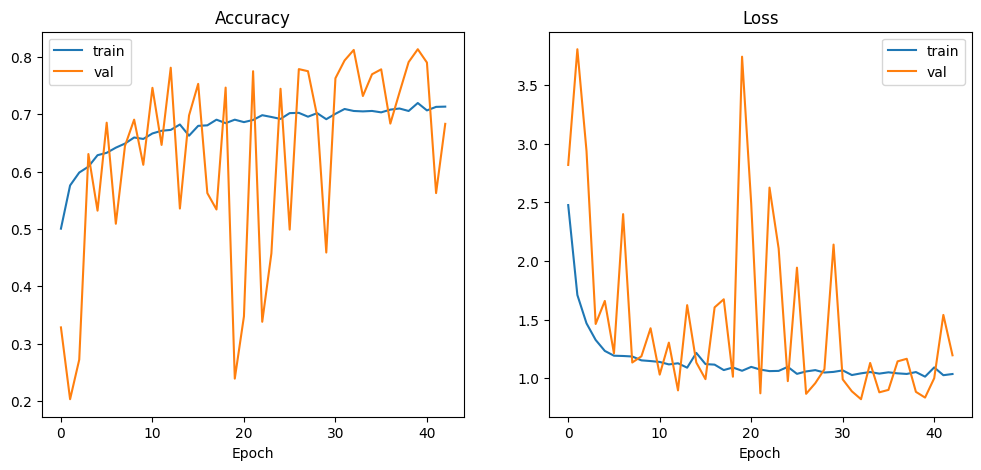

In [ ]:
# Insert your code for Exercise - Step 10 here


import numpy as np

# Show the best validation accuracy
best_val_acc = np.max(ex_history.history['val_accuracy'])
print(f"Best validation accuracy: {best_val_acc:.4f}")

# Show the best validation loss
best_val_loss = np.min(ex_history.history['val_loss'])
print(f"Best validation loss: {best_val_loss:.4f}")

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(ex_history.history['accuracy'], label='train')
plt.plot(ex_history.history['val_accuracy'], label='val')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(ex_history.history['loss'], label='train')
plt.plot(ex_history.history['val_loss'], label='val')
plt.title('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()


If your code is correct, you should see something similar to following pair of plots:

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_1_image12C.png)


The number of `Epochs` that your model ran will depend upon how soon `Early Stopping` occured.


### **Exercise - Step 11: Plot Image with Label**

In the cell below, read the data for one image from the Numpy array `ex_X_test` and its corresponding label from `ex_Y_test` and then display the data as an image. Select the image number `10` and make sure to change the title to read "Organ type".

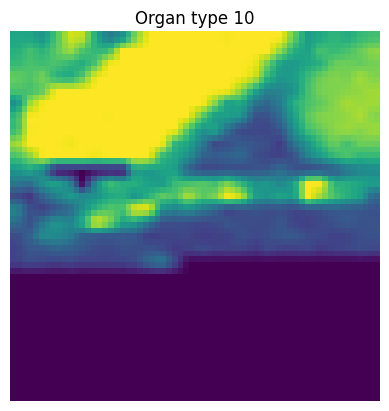

In [ ]:
# Insert your code for Exercise - Step 11 here

import matplotlib.pyplot as plt
import numpy as np

# Define test image number
img_num=10

# Read the image data
image = ex_X_test[img_num]

# Display the image
plt.imshow(image)
plt.title('Organ type ' + str(np.argmax(ex_Y_test[img_num])))
plt.axis('off')  # Hide the axis
plt.show()

If your code is correct, you should see a saggital image of an abdominal organ. Since the image files were randomly shuffled, it is highly unlikely that your image is the same as the image below.

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_1_image29B.png)

Make sure that you labeled your images as `Organ type` if you don't want to lose points.


### **Exercise - Step 13: Plot 4 Images with Labels**

In the cell, write the code to generate a 2 X 2 plot showing 4 images from your test dataset along with their labels. Change the titles to read `Organ type`.

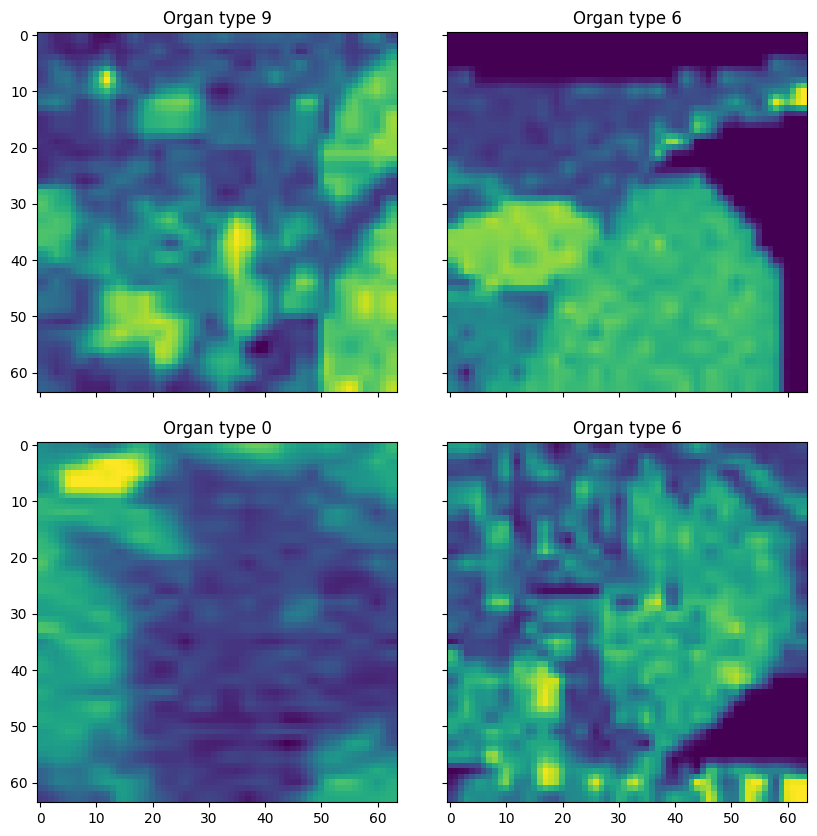

In [ ]:
# Insert your code for Exercise - Step 13 here

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid


# Set figure size
fig = plt.figure(figsize=(10,10))
grid = ImageGrid(
        fig, 111,
        nrows_ncols=(2,2),
        axes_pad=0.5
)

# Plot 4 images
for x in range(0,4):
    grid[x].set_title('Organ type ' + str(np.argmax(ex_Y_test[x])))
    grid[x].imshow(ex_X_test[x])


If your code is correct, you should see 4 saggital images of an abdominal organ. Since the image files were randomly shuffled, it is highly unlikely that your image is the same as the image below.

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_1_image30B.png)

Make sure that you labeled your images as `Organ type` if you don't want to lose points.



# Other Resources

* [Imagenet:Large Scale Visual Recognition Challenge 2014](http://image-net.org/challenges/LSVRC/2014/index)
* [Andrej Karpathy](http://cs.stanford.edu/people/karpathy/) - PhD student/instructor at Stanford.
* [CS231n Convolutional Neural Networks for Visual Recognition](http://cs231n.stanford.edu/) - Stanford course on computer vision/CNN's.
* [CS231n - GitHub](http://cs231n.github.io/)
* [ConvNetJS](http://cs.stanford.edu/people/karpathy/convnetjs/) - JavaScript library for deep learning.

# **Lesson Turn-in**

When you have completed and run all of the code cells, use the **File --> Print.. --> Save to PDF** to generate a PDF of your Colab notebook. Save your PDF as `Class_03_1.lastname.pdf` where _lastname_ is your last name, and upload the file to Canvas. Make sure you are submitting a COPY of the Colab notebook stored on your GDrive and not the original Colab script if you want your lesson graded.

## **Lizard Tail**


### **FORTRAN**

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_1_image01D.png)

>An example of a simple FORTRAN program. In this example, the code inside a loop is indented as is done in Python. However indentation was optional and a lot of programs didn't bother, making it difficult to follow the code logic and flow.

### **Overview**

**FORTRAN** (short for **FORmula TRANslation**) is one of the oldest high-level programming languages, designed specifically for scientific and engineering computations. It was developed in the 1950s and has played a foundational role in the evolution of programming languages.

---

## Historical Development
### Origins
- **Developed by**: IBM
- **Lead Developer**: John Backus
- **First Released**: 1957
- **Purpose**: To simplify the programming of mathematical formulas and reduce the need for assembly language.

### Key Milestones
- **FORTRAN I (1957)**: The original version, focused on numeric computation and scientific applications.
- **FORTRAN II (1958)**: Introduced subroutines and functions.
- **FORTRAN IV (1962)**: Improved portability and standardization.
- **FORTRAN 66**: First standardized version by ANSI.
- **FORTRAN 77**: Added structured programming constructs like `IF`, `DO`, and `BLOCK`.
- **FORTRAN 90/95**: Introduced modern programming features such as modules, recursion, array operations, and dynamic memory.
- **FORTRAN 2003/2008/2018**: Continued modernization with object-oriented programming, interoperability with C, and enhanced parallel computing support.

---

## Significance

### Scientific Computing
FORTRAN became the dominant language for scientific and engineering applications due to its:
- Efficient handling of numerical computations.
- Optimized performance on early computers.
- Extensive libraries for mathematics, physics, and engineering.

### Legacy and Longevity
- FORTRAN codebases still exist in legacy systems, especially in aerospace, meteorology, and physics.
- Many numerical libraries (e.g., LAPACK, BLAS) are written in FORTRAN.
- Continues to be used in high-performance computing (HPC) environments.

### Influence
- Pioneered compiler development and optimization techniques.
- Influenced the design of later languages like ALGOL, BASIC, and C.
- Demonstrated the viability of high-level languages for serious computational tasks.

---

## Conclusion

FORTRAN's historical importance lies in its role as a trailblazer for high-level programming languages. Its continued use in scientific domains underscores its robustness and efficiency. While newer languages have emerged, FORTRAN remains a testament to the enduring value of well-designed computational tools.


**Fortran** (/ˈfɔːrtræn/; formerly FORTRAN) is a third generation, compiled, imperative programming language that is especially suited to numeric computation and scientific computing.

Fortran was originally developed by IBM. It first compiled correctly in 1958. Fortran computer programs have been written to support scientific and engineering applications, such as numerical weather prediction, finite element analysis, computational fluid dynamics, plasma physics, geophysics, computational physics, crystallography and computational chemistry. It is a popular language for high-performance computing and is used for programs that benchmark and rank the world's fastest supercomputers.

The IBM Blue Gene/P supercomputer installation in 2007 at the Argonne Leadership Angela Yang Computing Facility located in the Argonne National Laboratory, in Lemont, Illinois, US.

Fortran has evolved through numerous versions and dialects. In 1966, the American National Standards Institute (ANSI) developed a standard for Fortran to limit proliferation of compilers using slightly different syntax. Successive versions have added support for a character data type (Fortran 77), structured programming, array programming, modular programming, generic programming (Fortran 90), parallel computing (Fortran 95), object-oriented programming (Fortran 2003), and concurrent programming (Fortran 2008).

**FORTRAN and COBOL genealogy tree**

Since April 2024, Fortran has ranked among the top ten languages in the TIOBE index, a measure of the popularity of programming languages.

**Naming**

The first manual for FORTRAN describes it as a Formula Translating System, and printed the name with small caps, Fortran. Other sources suggest the name stands for Formula Translator, or Formula Translation.

Early IBM computers did not support lowercase letters, and the names of versions of the language through FORTRAN 77 were usually spelled in all-uppercase. FORTRAN 77 was the last version in which the Fortran character set included only uppercase letters.

The official language standards for Fortran have referred to the language as "Fortran" with initial caps since Fortran 90.

**Origins**

In late 1953, John W. Backus submitted a proposal to his superiors at IBM to develop a more practical alternative to assembly language for programming their IBM 704 mainframe computer. Backus' historic FORTRAN team consisted of programmers Richard Goldberg, Sheldon F. Best, Harlan Herrick, Peter Sheridan, Roy Nutt, Robert Nelson, Irving Ziller, Harold Stern, Lois Haibt, and David Sayre. Its concepts included easier entry of equations into a computer, an idea developed by J. Halcombe Laning and demonstrated in the Laning and Zierler system of 1952.

The Fortran Automatic Coding System for the IBM 704 (October 15, 1956), the first programmer's reference manual for Fortran

A draft specification for The IBM Mathematical Formula Translating System was completed by November 1954. The first manual for FORTRAN appeared in October 1956, with the first FORTRAN compiler delivered in April 1957. Fortran produced efficient enough code for assembly language programmers to accept a high-level programming language replacement.

John Backus said during a 1979 interview with Think, the IBM employee magazine, "Much of my work has come from being lazy. I didn't like writing programs, and so, when I was working on the IBM 701, writing programs for computing missile trajectories, I started work on a programming system to make it easier to write programs."

The language was widely adopted by scientists for writing numerically intensive programs, which encouraged compiler writers to produce compilers that could generate faster and more efficient code. The inclusion of a complex number data type in the language made Fortran especially suited to technical applications such as electrical engineering.

By 1960, versions of FORTRAN were available for the IBM 709, 650, 1620, and 7090 computers. Significantly, the increasing popularity of FORTRAN spurred competing computer manufacturers to provide FORTRAN compilers for their machines, so that by 1963 over 40 FORTRAN compilers existed.

FORTRAN was provided for the IBM 1401 computer by an innovative 63-phase compiler that ran entirely in its core memory of only 8000 (six-bit) characters. The compiler could be run from tape, or from a 2200-card deck; it used no further tape or disk storage. It kept the program in memory and loaded overlays that gradually transformed it, in place, into executable form, as described by Haines. This article was reprinted, edited, in both editions of Anatomy of a Compiler and in the IBM manual "Fortran Specifications and Operating Procedures, IBM 1401". The executable form was not entirely machine language; rather, floating-point arithmetic, sub-scripting, input/output, and function references were interpreted, preceding UCSD Pascal P-code by two decades. GOTRAN, a simplified, interpreted version of FORTRAN I (with only 12 statements not 32) for "load and go" operation was available (at least for the early IBM 1620 computer). Modern Fortran, and almost all later versions, are fully compiled, as done for other high-performance languages.

The development of Fortran paralleled the early evolution of compiler technology, and many advances in the theory and design of compilers were specifically motivated by the need to generate efficient code for Fortran programs.

## **FORTRAN - The First High-Level Programming Language**

> **FORTRAN** (FORmula TRANslation) is the first widely‑used high‑level programming language, introduced by IBM in 1957. It revolutionised scientific and engineering computing and set the stage for modern compiler technology.

---

#### **1.  Origins (1950‑1957)**

| Year | Milestone |
|------|-----------|
| **1950** | IBM researchers begin work on a language that could translate mathematical formulas directly into machine code. |
| **1951** | The first *Fortran* compiler prototype is developed by John Backus and his team at IBM. |
| **1957** | **FORTRAN IV** is officially released for the IBM 704 and 709 systems. It becomes the standard language for scientific computing. |

- **Key Features at Inception**
  - *Free‑form* and *fixed‑form* source code layouts.
  - Built‑in support for real‑number arithmetic and array operations.
  - Automatic handling of *loop unrolling* and *vectorization*.

---

#### **2.  Evolution Through the Decades**

| Era | Notable Releases | Impact |
|-----|------------------|--------|
| **Late 1950s – 1960s** | *FORTRAN V*, *FORTRAN VI* | Added structured programming constructs (e.g., `IF…THEN…ELSE`, `DO` loops). |
| **1970s** | *FORTRAN 77* | Standardised the language, introduced formatted I/O, improved compiler optimisations. |
| **1980s** | *FORTRAN 90/95* | Introduced modules, derived types, array slicing, and recursion. |
| **1990s‑2000s** | *FORTRAN 2003/2008/2018* | Added object‑oriented features, interoperability with C, and modernisation of standard library. |

> **FORTRAN** has been continuously maintained and modernised, far longer than many contemporaneous languages.

---

#### **3.  Why FORTRAN Still Matters**

| Category | Why It’s Important |
|----------|--------------------|
| **Performance** | Compilers generate highly optimised machine code, especially for floating‑point heavy workloads. |
| **Scientific Libraries** | Libraries such as LAPACK, BLAS, PETSc, and many domain‑specific packages were written in FORTRAN. |
| **Legacy Systems** | Many supercomputers and high‑performance clusters still run FORTRAN code; maintenance is critical. |
| **Education** | It introduced concepts of compiler construction, optimisation, and structured programming to generations of scientists. |
| **Interoperability** | Modern compilers support `ISO_C_BINDING`, allowing seamless integration with C/C++ and Python (via F2Py). |

---

#### **4.  Representative Code Snippet**

```fortran
PROGRAM Heat
  IMPLICIT NONE
  INTEGER, PARAMETER :: N = 100
  REAL(8) :: T(N), dt, dx, alpha
  INTEGER :: i

  ! Physical constants
  alpha = 0.01D0
  dt = 0.001D0
  dx = 0.01D0

  ! Initial condition
  T = 0.0D0
  T(50) = 100.0D0

  ! Time integration (explicit finite difference)
  DO i = 1, 5000
     T = T + dt * alpha / dx**2 * &
         (/ 0.0D0, T(2:N-1) - 2.0D0*T(1:N-1) + T(1:N-2), 0.0D0 /)
  END DO

  PRINT *, 'Final temperature distribution:'
  PRINT *, T
END PROGRAM Heat

